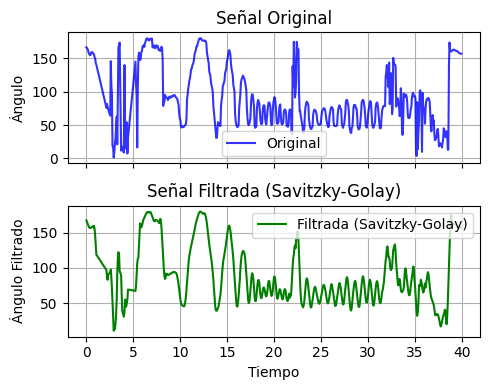

In [1]:
#carga de archivo e importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

archivo_csv = "profef_der.csv"
window_length = 11 
polyorder = 3      
prominencia = 10   

df = pd.DataFrame()
peaks_golay = np.array([])
valleys_golay = np.array([])

try:
    # Cargar datos
    df = pd.read_csv(archivo_csv, skiprows=1, names=["Tiempo", "Angulo"])
    df["Tiempo"] = pd.to_numeric(df["Tiempo"], errors='coerce')
    df["Angulo"] = pd.to_numeric(df["Angulo"], errors='coerce')
    df.dropna(inplace=True)

    if not df.empty:
        if len(df) > window_length:
            df["Golay"] = savgol_filter(df["Angulo"], window_length=window_length, polyorder=polyorder)
            
            peaks_golay, _ = find_peaks(df["Golay"], prominence=prominencia)
            valleys_golay, _ = find_peaks(-df["Golay"], prominence=prominencia)
        else:
            print(f"Advertencia: No hay suficientes datos ({len(df)}) para aplicar el filtro con window_length={window_length}. Se usará la señal original.")
            df["Golay"] = df["Angulo"]
        
        fig, ax = plt.subplots(2, 1, figsize=(5, 4), sharex=True) 


        ax[0].plot(df["Tiempo"], df["Angulo"], 'b-', alpha=0.8, label="Original")
        ax[0].set_ylabel("Ángulo")
        ax[0].set_title("Señal Original")
        ax[0].legend()
        ax[0].grid(True)


        ax[1].plot(df["Tiempo"], df["Golay"], 'g-', label="Filtrada (Savitzky-Golay)")
        ax[1].set_xlabel("Tiempo")
        ax[1].set_ylabel("Ángulo Filtrado")
        ax[1].set_title("Señal Filtrada (Savitzky-Golay)")
        ax[1].legend()
        ax[1].grid(True)

        plt.tight_layout() 

    else:
        print("El DataFrame está vacío después de procesar el archivo.")

except FileNotFoundError:
    print(f"Error: El archivo '{archivo_csv}' no fue encontrado.")
except Exception as e:
    print(f"Ocurrió un error al leer o procesar el archivo en la Celda 1: {e}")

--- Picos (Máximos) Encontrados ---
  1. Tiempo: 2.6007, Ángulo Filtrado: 97.4560
  2. Tiempo: 3.4162, Ángulo Filtrado: 122.1626
  3. Tiempo: 4.1230, Ángulo Filtrado: 55.0824
  4. Tiempo: 6.7376, Ángulo Filtrado: 179.2158
  5. Tiempo: 12.1065, Ángulo Filtrado: 179.6800
  6. Tiempo: 15.2267, Ángulo Filtrado: 159.8246
  7. Tiempo: 16.7359, Ángulo Filtrado: 123.6922
  8. Tiempo: 17.6741, Ángulo Filtrado: 92.3300
  9. Tiempo: 18.3659, Ángulo Filtrado: 82.8430
  10. Tiempo: 18.9293, Ángulo Filtrado: 72.1934
  11. Tiempo: 19.4903, Ángulo Filtrado: 81.4378
  12. Tiempo: 20.0489, Ángulo Filtrado: 87.8391
  13. Tiempo: 20.6075, Ángulo Filtrado: 69.6890
  14. Tiempo: 21.1688, Ángulo Filtrado: 69.8325
  15. Tiempo: 22.5497, Ángulo Filtrado: 151.7647
  16. Tiempo: 23.4793, Ángulo Filtrado: 84.9822
  17. Tiempo: 24.3625, Ángulo Filtrado: 73.1186
  18. Tiempo: 25.2965, Ángulo Filtrado: 75.9148
  19. Tiempo: 26.1054, Ángulo Filtrado: 76.7921
  20. Tiempo: 26.9825, Ángulo Filtrado: 78.5722
  21. Tiemp

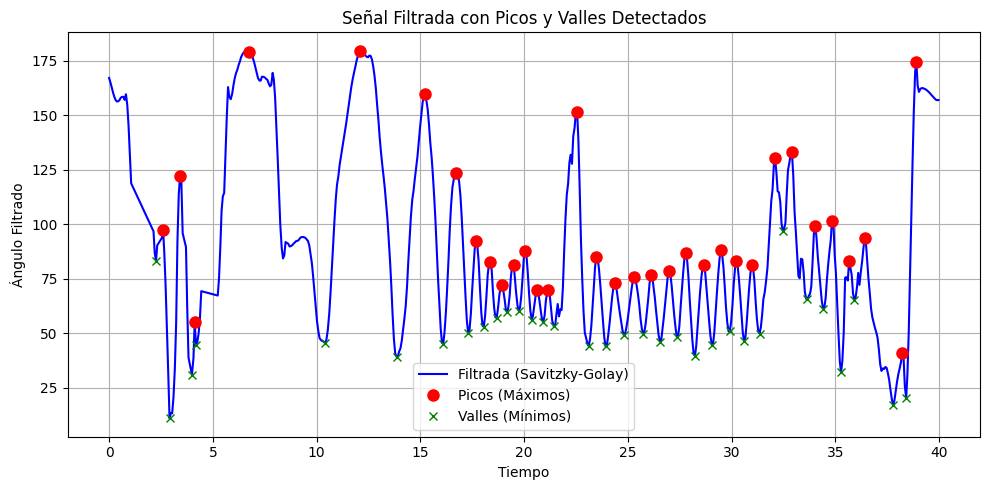

In [2]:
#Aplicacion de filtro Savitzky-Golay y detección de picos/valles

print("--- Picos (Máximos) Encontrados ---")

if peaks_golay.size > 0:
   
    for i, peak_index in enumerate(peaks_golay):
    
        tiempo_pico = df['Tiempo'].iloc[peak_index]
        angulo_pico = df['Golay'].iloc[peak_index]
        
        print(f"  {i+1}. Tiempo: {tiempo_pico:.4f}, Ángulo Filtrado: {angulo_pico:.4f}")
else:
    print(" No se encontraron picos ")

print("\nValles (Mínimos) Encontrados ")

if valleys_golay.size > 0:
    
    for i, valley_index in enumerate(valleys_golay):
        
        tiempo_valle = df['Tiempo'].iloc[valley_index]
        angulo_valle = df['Golay'].iloc[valley_index]
        
        print(f"  {i+1}. Tiempo: {tiempo_valle:.4f}, Ángulo Filtrado: {angulo_valle:.4f}")
else:
    
    print("  No se encontraron valles con la prominencia especificada.")


fig, ax = plt.subplots(figsize=(10, 5)) 


ax.plot(df["Tiempo"], df["Golay"], 'b-', label="Filtrada (Savitzky-Golay)")


ax.plot(df["Tiempo"].iloc[peaks_golay], df["Golay"].iloc[peaks_golay],
        "o", color='red', markersize=8, label='Picos (Máximos)')


ax.plot(df["Tiempo"].iloc[valleys_golay], df["Golay"].iloc[valleys_golay],
        "x", color='green', markersize=6, label='Valles (Mínimos)')

ax.set_xlabel("Tiempo")
ax.set_ylabel("Ángulo Filtrado")
ax.set_title("Señal Filtrada con Picos y Valles Detectados")
ax.legend() 
ax.grid(True) 

plt.tight_layout()
plt.show()

Máximo global (entre picos): 179.6800
Mínimo global (entre valles): 10.8563


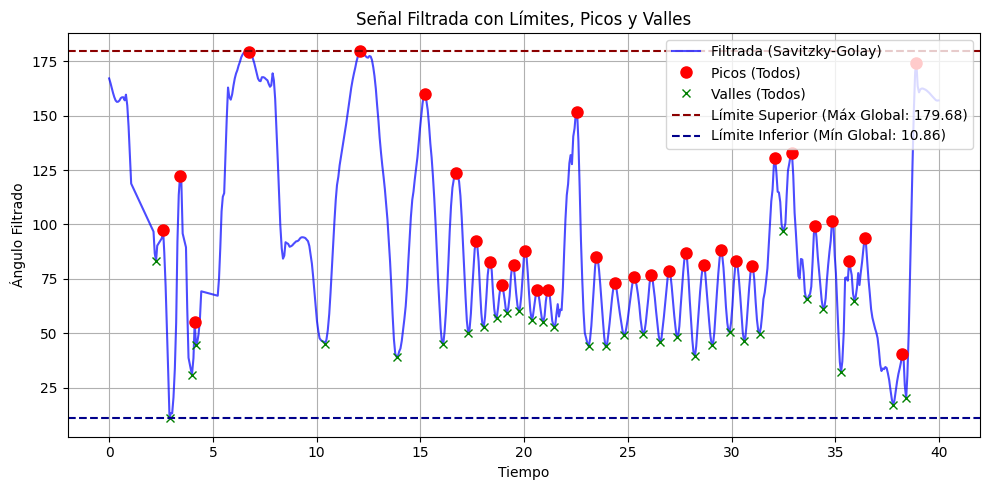

In [3]:
# Identificacion de limites

maximo_global = None 
minimo_global = None 

# Encontrar el valor máximo entre todos los picos detectados
if peaks_golay.size > 0:
    
    valores_picos = df['Golay'].iloc[peaks_golay]
   
    maximo_global = np.max(valores_picos)
    print(f"Máximo global (entre picos): {maximo_global:.4f}")
else:
    print("No se encontraron picos para determinar el máximo global.")

# Encontrar el valor mínimo entre todos los valles detectados
if valleys_golay.size > 0:
    # Obtener los valores de los ángulos filtrados en los índices de los valles
    valores_valles = df['Golay'].iloc[valleys_golay]
    
    minimo_global = np.min(valores_valles)
    print(f"Mínimo global (entre valles): {minimo_global:.4f}")
else:
    print("No se encontraron valles para determinar el mínimo global.")


fig, ax = plt.subplots(figsize=(10, 5))


ax.plot(df["Tiempo"], df["Golay"], 'b-', label="Filtrada (Savitzky-Golay)", alpha=0.7) # Leve transparencia para ver mejor los marcadores

 
ax.plot(df["Tiempo"].iloc[peaks_golay], df["Golay"].iloc[peaks_golay],
        "o", color='red', markersize=8, label='Picos (Todos)')

ax.plot(df["Tiempo"].iloc[valleys_golay], df["Golay"].iloc[valleys_golay],
        "x", color='green', markersize=6, label='Valles (Todos)')


if maximo_global is not None:
    ax.axhline(y=maximo_global, color='darkred', linestyle='--', label=f'Límite Superior (Máx Global: {maximo_global:.2f})')


if minimo_global is not None:
    ax.axhline(y=minimo_global, color='darkblue', linestyle='--', label=f'Límite Inferior (Mín Global: {minimo_global:.2f})')


ax.set_xlabel("Tiempo")
ax.set_ylabel("Ángulo Filtrado")
ax.set_title("Señal Filtrada con Límites, Picos y Valles")
ax.legend() 
ax.grid(True) 


plt.tight_layout()
plt.show()


In [4]:
#Conteo de repeticiones
eventos = []
for idx in peaks_golay:
    eventos.append({'indice': idx, 'tipo': 'pico', 'tiempo': df['Tiempo'].iloc[idx]})
for idx in valleys_golay:
    eventos.append({'indice': idx, 'tipo': 'valle', 'tiempo': df['Tiempo'].iloc[idx]})


eventos_ordenados = sorted(eventos, key=lambda x: x['indice'])


num_repeticiones_especificas = 0


if len(eventos_ordenados) >= 3:
    
    primer_evento_tipo = eventos_ordenados[0]['tipo']

   
    for i in range(len(eventos_ordenados) - 2):
        evento_actual = eventos_ordenados[i]
        evento_siguiente = eventos_ordenados[i+1]
        evento_subsiguiente = eventos_ordenados[i+2]

        
        if primer_evento_tipo == 'pico':
            if evento_actual['tipo'] == 'pico' and \
               evento_siguiente['tipo'] == 'valle' and \
               evento_subsiguiente['tipo'] == 'pico':
                num_repeticiones_especificas += 1

       
        elif primer_evento_tipo == 'valle':
             if evento_actual['tipo'] == 'valle' and \
                evento_siguiente['tipo'] == 'pico' and \
                evento_subsiguiente['tipo'] == 'valle':
                 num_repeticiones_especificas += 1

print(f"Número de repeticiones: {num_repeticiones_especificas}")



Número de repeticiones: 32


In [ ]:
# Repeticiones correctas según umbrales
tolerancia_minimo = 20.0 
tolerancia_maximo = 20.0 


num_repeticiones_correctas = 1


if minimo_global is not None and maximo_global is not None:
   
    umbral_valle_superior = minimo_global + tolerancia_minimo
    umbral_pico_inferior = maximo_global - tolerancia_maximo

    print(f"Umbral para valles correctos (valle <= min_global + {tolerancia_minimo}): {umbral_valle_superior:.4f}")
    print(f"Umbral para picos correctos (pico >= max_global - {tolerancia_maximo}): {umbral_pico_inferior:.4f}")

    eventos = []
    for idx in peaks_golay:
        eventos.append({'indice': idx, 'tipo': 'pico', 'valor': df['Golay'].iloc[idx]})
    for idx in valleys_golay:
        eventos.append({'indice': idx, 'tipo': 'valle', 'valor': df['Golay'].iloc[idx]})

    eventos_ordenados = sorted(eventos, key=lambda x: x['indice'])

    
    if len(eventos_ordenados) >= 3:
        primer_evento_tipo = eventos_ordenados[0]['tipo']

        
        for i in range(len(eventos_ordenados) - 2):
            p1_o_v1 = eventos_ordenados[i]
            v_o_p = eventos_ordenados[i+1]
            p2_o_v2 = eventos_ordenados[i+2]

            
            if primer_evento_tipo == 'pico' and \
               p1_o_v1['tipo'] == 'pico' and \
               v_o_p['tipo'] == 'valle' and \
               p2_o_v2['tipo'] == 'pico':
                
                
                condicion_p1 = p1_o_v1['valor'] >= umbral_pico_inferior
                condicion_v = v_o_p['valor'] <= umbral_valle_superior
                condicion_p2 = p2_o_v2['valor'] >= umbral_pico_inferior
                
                if condicion_p1 and condicion_v and condicion_p2:
                    num_repeticiones_correctas += 1
                

            
            elif primer_evento_tipo == 'valle' and \
                 p1_o_v1['tipo'] == 'valle' and \
                 v_o_p['tipo'] == 'pico' and \
                 p2_o_v2['tipo'] == 'valle':

                
                condicion_v1 = p1_o_v1['valor'] <= umbral_valle_superior
                condicion_p = v_o_p['valor'] >= umbral_pico_inferior
                condicion_v2 = p2_o_v2['valor'] <= umbral_valle_superior

                if condicion_v1 and condicion_p and condicion_v2:
                    num_repeticiones_correctas += 1
                    

    
    print(f"\nNúmero de repeticiones CORRECTAS (según umbrales de picos y valles): {num_repeticiones_correctas}")

else:
    print("No se encontró un mínimo global y/o un máximo global.")
    print("No se puede calcular el número de repeticiones correctas con los criterios actuales.")
    print(f"\nNúmero de repeticiones CORRECTAS (basado en mínimos y máximos): 0")

Umbral para valles correctos (valle <= min_global + 20.0): 30.8563
Umbral para picos correctos (pico >= max_global - 20.0): 159.6800

Número de repeticiones CORRECTAS (según umbrales de picos y valles): 0
